In [4]:
#Example 2: k-means for color compression
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


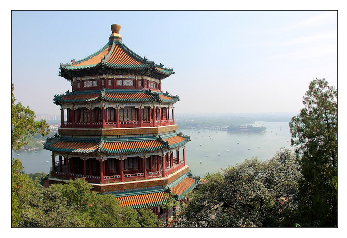

In [8]:
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [9]:
china.shape

(427, 640, 3)

In [10]:
#transforming the data for easy extraction of patterns
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [62]:
def plot_pixels(data, title, colors=None, N=10000,center=None):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)#creates a fix random state, so always same permutations
    i = rng.permutation(data.shape[0])[0:N]#takes the first N samples
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);
    
    if center is not None:
        new_colors=center
        ax[0].scatter(new_colors[:,0],new_colors[:,1], marker='*',s=200,c='black')
        ax[1].scatter(new_colors[:,0],new_colors[:,2], marker='*',s=200,c='black')
        

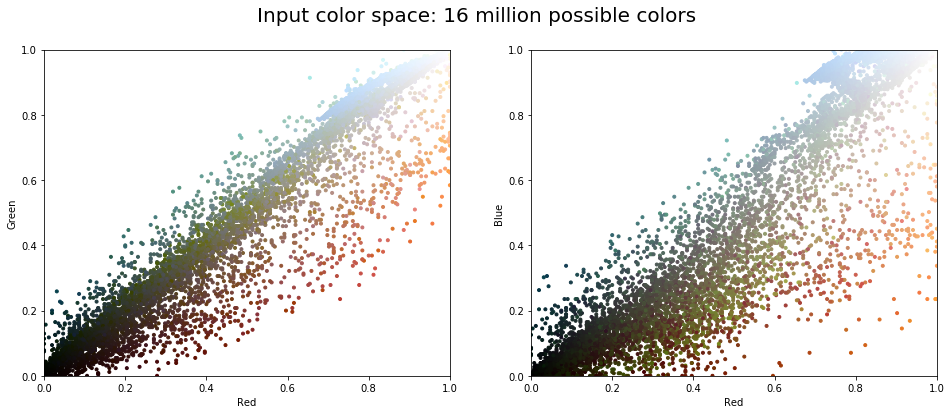

In [63]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [69]:
print(data.shape)
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans# this is a faster k-means
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

print(new_colors.shape)

(273280, 3)
(273280, 3)


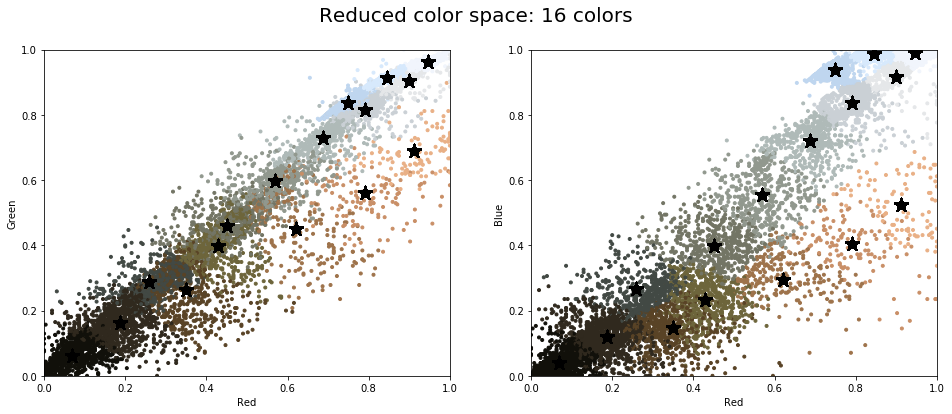

In [65]:
plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors",center=new_colors)




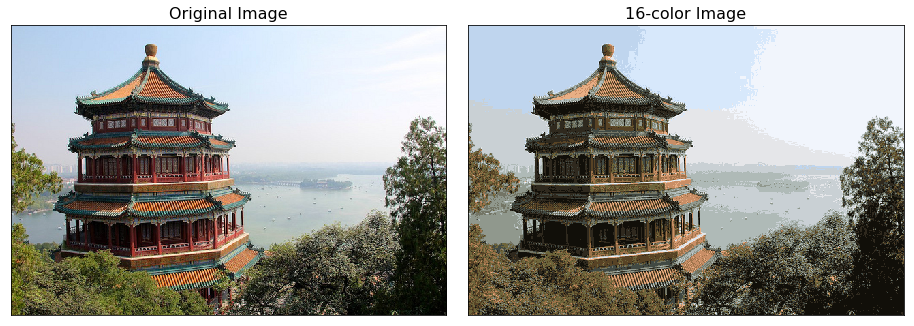

In [66]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);